# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Datasetcreation

In [2]:
# Create Dataset
dataset = np.array([[1, 3, 0], 
                    [2, 4, 0], 
                    [3, 5, 0],
                    [3, 4, 0], 
                    [3.5, 3, 0], 
                    [4, 4, 0],
                    [4, 3, 0], 
                    [1, 1, 1], 
                    [9, 3, 1],
                    [10, 5, 1],
                    [12, 2, 1], 
                    [11, 4, 1],
                    [8, 5, 1],
                    [19, 3, 1]])
X = dataset[:14, 0:2]
y = dataset[:14, -1]

# Standardize Dataset
sc = StandardScaler()
X_std = sc.fit_transform(X)

# Analysis of the Regularization Parameter: *C*

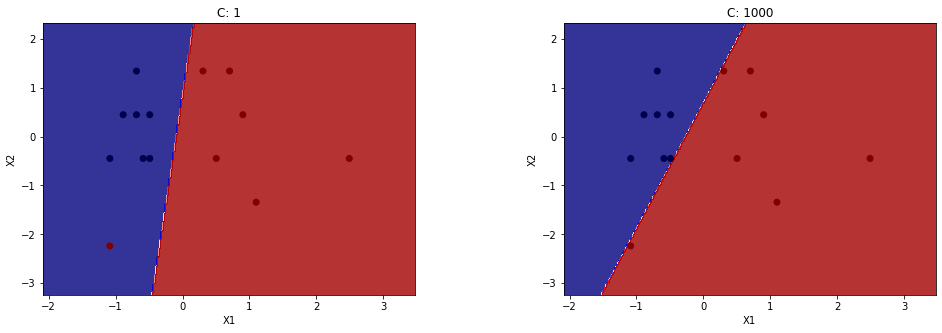

In [3]:
# Initialize the model and Training the model
# For C, coef0 and gamma: Default Values are chosen
model_dictionary = {}
list_C = [1, 1000]
for i in list_C:
    model_dictionary["model%s" %i] = SVC(kernel='linear',  
                                          C=i).fit(X_std, y)

h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X_std[:, 0].min() - 1, X_std[:, 0].max() + 1
y_min, y_max = X_std[:, 1].min() - 1, X_std[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# title for the plots
titles = list()
for i in list_C:
    titles.append('C: ' + str(i))

# Determine the size of the figures
fig=plt.figure(figsize=(16, 5))

for i, clf in enumerate(model_dictionary.values()):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(int(len(model_dictionary.values())/2), 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.7)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.seismic, alpha=0.8)
    
    # Plot also the training points
    plt.scatter(X_std[:, 0], X_std[:, 1], c=y, cmap=plt.cm.seismic)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks()
    plt.yticks()
    plt.title(titles[i])
plt.show()

# Takeaway: 
The Linear Kernel is also affected by the Hyperparameter C, which is used for regularization. For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. This can also be exhibited by this plot. Using a C=1, one sample is missclassified but the decision boundary looks likely to generalize well, i.e. no overfitting. In contrast, with a C=1000, no misclassifications during training occur, but the decision boundary does not seem not generalize well as it tries to classify the red dot at the bottem left correctly, which in reality is probably just an outlier. The model overfits.